CLIP(Constrative Language-Image Pre-training) OpenAI에서만든 모델
  - 이미지와 텍스트를 동일한 벡터공간으로 매핑해서 이미지-텍스트 매칭 및 다양한 멀티모달 작업을 수행
  - 이미지와 텍스트를 쌍으로하는 대규모 데이터셋을 사용해서 훈련, 이를 통해 이미지와 텍스트 간의 의미적 관계를 학습  

- 작동방식
  - 입력처리: 이미지는 CNN 또는 Vit 기반 이미지 인코더에 의해서 벡터로변환
  - 텍스트 : BERT 와 유사한 Transformer 기반 텍스트 인코더를 통해 벡터로 변환
- 멀티모달 표현:
  - 이미지와 텍스트는 각각 512차원의 벡터로 변환
- 학습
  - 정답 이미지-텍스트 쌍의 점수를 최대화하고 , 오답쌍의점수를 최소화 하도록 훈련    

- 응용
  - 이미지 검색
  - 텍스트 생성
  - 이미지 분류

In [1]:
!pip install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --yes
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-n18az__n
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-n18az__n
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=822e65d31da18be366dfa5c7f811b9ccde6ae0ddf12cc6f702d91ccf4702bbb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-i9vpt4tu/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b1

In [26]:
import torch
import clip
from PIL import Image
# 모델 토크나이져 불러오기

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 114MiB/s]


In [16]:
text_lists = ["a dog", "a cat", "a bird",'a human']

In [17]:
# 이미지와 텍스트 준비
image = preprocess(Image.open("cute_dog.jpg")).unsqueeze(0).to(device)
texts = clip.tokenize(text_lists).to(device)

In [18]:
# 이미지와 텍스트 임베딩 계산
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(texts)

In [19]:
# 유사도 계산(코사인 유사도)
# 노름 norm  : 벡터정규화 또는 노름연산을 수행하는 데 사용  벡터의 길이를 계산(유클리드 거리)
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

In [20]:
similarity.cpu().numpy()

array([[0.9789838 , 0.00871402, 0.0029617 , 0.00934043]], dtype=float32)

CIFAR-100 데이터셋 활용

In [2]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 101MiB/s]


100%|██████████| 169M/169M [00:12<00:00, 13.1MB/s]


Extracting /root/.cache/cifar-100-python.tar.gz to /root/.cache


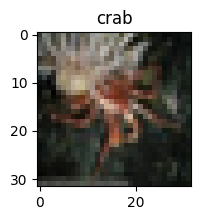

In [19]:
import matplotlib.pyplot as plt
import numpy as np
image, label = cifar100[100]
plt.figure(figsize=(2,2))
plt.imshow(image)
plt.title(cifar100.classes[label])
plt.show()

In [12]:
cifar100.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [20]:
# Prepare the inputs
image, class_id = cifar100[100]
image_input = preprocess(image).unsqueeze(0).to(device)  # 4차원형태
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")


Top predictions:

            crab: 21.95%
          spider: 19.67%
   aquarium_fish: 8.59%
       pine_tree: 5.29%
       palm_tree: 4.60%


Vit-B/32 외 다른 모델을 사용

In [21]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

- CNN 대신에 이미지의 특성을 추출하는 역활을 CLIP이대체하고
- 그 데이터를 받아서 기계학습에 적용한다

In [23]:
import os
import clip
import torch

import numpy as np
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100
from tqdm import tqdm

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Load the dataset
root = os.path.expanduser("~/.cache")
train = CIFAR100(root, download=True, train=True, transform=preprocess)
test = CIFAR100(root, download=True, train=False, transform=preprocess)

# 특징 추출 함수 - CNN 대처
def get_features(dataset):
    all_features = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(DataLoader(dataset, batch_size=100)):
            features = model.encode_image(images.to(device))
            all_features.append(features)
            all_labels.append(labels)

    return torch.cat(all_features).cpu().numpy(), torch.cat(all_labels).cpu().numpy()

# Calculate the image features
train_features, train_labels = get_features(train)
test_features, test_labels = get_features(test)

# Perform logistic regression
classifier = LogisticRegression(random_state=0, C=0.316, max_iter=1000, verbose=1)
classifier.fit(train_features, train_labels)

# Evaluate using the logistic regression classifier
predictions = classifier.predict(test_features)
accuracy = np.mean((test_labels == predictions).astype(float)) * 100.
print(f"Accuracy = {accuracy:.3f}")

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


Accuracy = 72.430


-  사용자가 입력한 텍스트 설명(ex: black color bag) 와 제품 이미지를 매칭해서 검색 결과를 제공
 - few shot learning 을 사용

In [78]:
# 데이터
image_paths = [
    'bag1.jpg','bag2.jpg','bag3.jpg','bag4.jpg','bag5.jpg',
]
texts = [
    'Large Canvas Tote Bag for Women,Womens Laptop Work Book Bags Crossbody Purse Handbag Shoulder Travel Messenger Gym Totes',
    'PAZIMIIK Corduroy Tote Bags for Women Travel Reusable Grocery Shopping Shoulder Go-to Everyday Bag for Work',
    'Tactical Camping Storage Bag Utility Tote Bag Camping Kitchen Organizer with Axe Holder & Shoulder Strap',
    'Laptop Tote Bag for Women 15.6 Inch Waterproof Leather Computer Bags Women Business Office Work Bag Briefcase Brown',
    'Valleycomfy Tote Bag for Women Corduroy Crossbody Tote Bag Purse Women Travel Shoulder Bags Work Handbags Everyday Hobo Bag'
]
# 이미지 전처리 및 텍스트 토크나이져
images = [ preprocess(Image.open(image_path)).unsqueeze(0).to(device) for image_path in image_paths]
text_inputs = clip.tokenize(texts).to(device)

# 특징 추출
with torch.no_grad():
    image_features = torch.cat([model.encode_image(image) for image in images])
    text_features = model.encode_text(text_inputs)

# 특징 정규화
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

# 유사도 계산
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

# 유사도 기반 가장 매칭이 잘된 이미지를 선택
for i, img_path in enumerate(image_paths):
  top_match = similarity[i].argmax().item()
  print(f'image {img_path} match text : {texts[top_match]}')

# 학습결과를 바탕으로 텍스트 기반 이미지 매칭
search_query = input("찾고자하는 가방에대해 설명해 주세요(영어로)")
text_inputs = clip.tokenize([search_query]).to(device)

# 특징 추출
with torch.no_grad():
    text_features = model.encode_text(text_inputs)
    text_features /= text_features.norm(dim=-1, keepdim=True)
# 유사도 계산
simularity = image_features @ text_features.T
most_simularity_index = simularity.argmax().item()
print(f'most simularity of images : {image_paths[most_simularity_index]}')